QUESTIONS TO BE ANSWERED BY THIS DATA ANALYSIS:

Which year has the highest release of movies?

Which Movie Has The Highest Or Lowest Profit? Top 10 movies which earn highest profit?

Movie with Highest And Lowest Budget?

Which movie made the highest revenue and lowest as well?

Movie with shortest and longest runtime?

Which movie get the highest or lowest votes (Ratings).

Which Year Has The Highest Profit Rate?

Which length movies are most liked by the audiences according to their popularity?

Average Runtime Of Movies From Year To Year?

How Does The Revenue And Popularity differs Budget And Runtime? And How Does Popularity Depends On Profit?

Which Month Released Highest Number Of Movies In All Of The Years? And Which Month Made The Highest Average Revenue?

Which Genre Has The Highest Release Of Movies?

Top 20 Production Companies With Higher Number Of Release?

Life Time Profit Earn By Each Production Company?

Top 20 Director Who Directs Maximum Movies?



The last section of this notebook contains code for creating a machine learning model that predicts popularity from revenue and runtime from budget

Import necessary libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split

View and clean the data

In [2]:
df = pd.read_excel("tmdb_movies_data.xlsx")
df.columns = df.iloc[0]                     #rename the columns
df = df.drop(index = 0)
df = df.dropna()
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1392445893
2,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,348161292.5
3,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,271619025.4
4,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919,1902723130
5,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1385748801


Find the year with maximum movie releases

The maximum number of movie releases were in the year 2011
The number of movies released in 2011 were 219


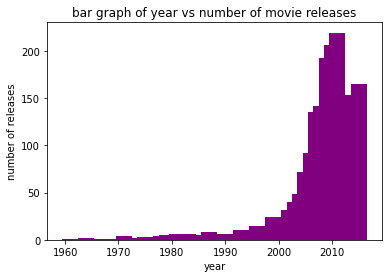

In [3]:
n_releases = df.groupby(["release_year"]).size()            #create series containing data of number of releases in a year
year = n_releases.index                             
number_releases = n_releases.values   

datadict = {"Year of release":year, "Number of releases":number_releases}
new_df = pd.DataFrame(datadict)                                               #create new dataframe containing info about number of releases in a year
new_df.head(100)    
max_num = new_df[new_df['Number of releases']==max(new_df['Number of releases'])]
print("The maximum number of movie releases were in the year {y}".format(y=max_num.iloc[0, 0]))
print("The number of movies released in {y} were {n}".format(y=max_num.iloc[0, 0], n=max_num.iloc[0, 1]))


plt.title("bar graph of year vs number of movie releases")                 #plot a graph showing variation in number of movies releases with time
plt.xlabel("year")                                        
plt.ylabel("number of releases")
plt.bar(year, number_releases, color = 'purple', width = 3)
plt.show()

Find which movie made most/least profits

In [4]:
df["Profit"] = df["revenue"]-df["budget"]            #add a profit column to the dataframe
df.head()     
max_prof = df[df["Profit"]==max(df['Profit'])]       #find which movie made the most profit     
max_prof.head()                 
print("The movie which made the most profit was {m}, earning ${x}.".format(m = max_prof.iloc[0,5], x = max_prof.iloc[0, 21]))

min_prof = df[df["Profit"]==min(df["Profit"])]        #find which movie made the least profit
min_prof.head()
print("The movie which made the least profit was {m}, incurring a loss of ${x}.".format(m = min_prof.iloc[0,5], x = min_prof.iloc[0, 21]))


The movie which made the most profit was Avatar, earning $2544505847.
The movie which made the least profit was The Warrior's Way, incurring a loss of $-413912431.


Find top 10 highest earning movies

The top 10 most profitable movies are 
['Avatar' 'Star Wars: The Force Awakens' 'Titanic' 'Jurassic World'
 'Furious 7' 'The Avengers' 'Harry Potter and the Deathly Hallows: Part 2'
 'Avengers: Age of Ultron' 'Frozen' 'Minions']


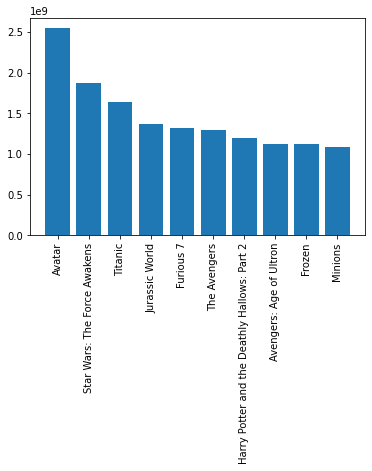

In [5]:
new_df = df.sort_values('Profit', ascending = False); #sorting the profit values in descending order
new_df.head()
top_10 = new_df.iloc[0:10, 5]
print("The top 10 most profitable movies are \n{m}".format(m = top_10.values))

y = new_df.iloc[0:10, 21]
x = np.arange(1, 11, 1)
plt.bar(x, y)
plt.xticks(x, top_10.values, rotation=90)
plt.show()



Finding movie with most and least budget


In [6]:
high_budget = df[df["budget"]==max(df["budget"])]#use boolean indexing to find df section with maximum profit
high_budget.head()
high_budget_movie = high_budget.iloc[0, 5]
print("The movie with the highest budget was {m}".format(m = high_budget_movie))

low_budget = df[df["budget"]==min(df["budget"])]
low_budget.head()

The movie with the highest budget was The Warrior's Way


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,Profit
31,280996,tt3168230,3.927333,0,29355203,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,http://www.mrholmesfilm.com/,Bill Condon,The man behind the myth,...,103,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,6/19/2015,425,6.4,2015,0,27006774.88,29355203
76,308369,tt2582496,2.141506,0,0,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,http://www.foxsearchlight.com/meandearlandthed...,Alfonso Gomez-Rejon,A Little Friendship Never Killed Anyone.,...,105,Comedy|Drama,Indian Paintbrush,6/12/2015,569,7.7,2015,0,0,0
89,301875,tt3289728,1.959765,0,2000000,Equals,Kristen Stewart|Nicholas Hoult|Guy Pearce|Jack...,http://equals-the-movie.com/,Drake Doremus,Find your equal.,...,101,Drama|Romance|Science Fiction,Scott Free Productions|Infinite Frameworks Stu...,9/4/2015,135,5.6,2015,0,1839999.19,2000000
96,258509,tt2974918,1.841779,0,233755553,Alvin and the Chipmunks: The Road Chip,Jason Lee|Justin Long|Bella Thorne|Matthew Gra...,http://www.foxmovies.com/movies/alvin-and-the-...,Walt Becker,Fast & furry-ous,...,92,Adventure|Animation|Comedy|Family,Regency Enterprises|Fox 2000 Pictures|Sunswept...,12/17/2015,278,5.7,2015,0,215055014.1,233755553
133,263109,tt2872750,1.25358,0,59700000,Shaun the Sheep Movie,Justin Fletcher|Omid Djalili|Richard Webber|Ka...,http://www.shaunthesheep.com/,Mark Burton|Richard Starzack,Moving on to Pastures New.,...,85,Family|Animation|Comedy|Adventure,Aardman Animations|Studio Canal|Anton Capital ...,2/5/2015,340,6.9,2015,0,54923975.83,59700000


Finding which movie made most and least revenue

In [7]:
most_revenue = df[df["revenue"]==max(df["revenue"])]
most_revenue.head()
print("The movie with the most revenue was {m}".format(m = most_revenue.iloc[0, 5]))


least_revenue = df[df["revenue"]==min(df["revenue"])]
least_revenue.head()

The movie with the most revenue was Avatar


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,Profit
68,334074,tt3247714,2.331636,20000000,0,Survivor,Pierce Brosnan|Milla Jovovich|Dylan McDermott|...,http://survivormovie.com/,James McTeigue,His Next Target is Now Hunting Him,...,96,Crime|Thriller|Action,Nu Image Films|Winkler Films|Millennium Films|...,5/21/2015,280,5.4,2015,18399991.9,0,-20000000
76,308369,tt2582496,2.141506,0,0,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,http://www.foxsearchlight.com/meandearlandthed...,Alfonso Gomez-Rejon,A Little Friendship Never Killed Anyone.,...,105,Comedy|Drama,Indian Paintbrush,6/12/2015,569,7.7,2015,0,0,0
144,378373,tt3532278,1.128081,0,0,Brothers of the Wind,Manuel Camacho|Jean Reno|Tobias Moretti|Eva Kuen,http://www.terramater.at/cinema/brothers-of-th...,Gerado Olivares|Otmar Penker,Sometimes a friendship sets you free,...,98,Adventure|Drama|Family,Terra Mater Factual Studios,12/24/2015,11,7.5,2015,0,0,0
160,251516,tt3472226,0.953046,630019,0,Kung Fury,David Sandberg|Jorma Taccone|Leopold Nilsson|A...,http://www.kungfury.com/,David Sandberg,It takes a cop from the future to fight an ene...,...,31,Action|Comedy|Science Fiction|Fantasy,Laser Unicorns,5/28/2015,487,7.7,2015,579617.225,0,-630019
175,342474,tt3289712,0.861179,0,0,Jenny's Wedding,Katherine Heigl|Tom Wilkinson|Alexis Bledel|Gr...,https://www.facebook.com/jennysweddingmovie,Mary Agnes Donoghue,Family is worth fighting for.,...,94,Comedy|Drama,MM Productions|Merced Media Partners|PalmStar ...,7/31/2015,92,5.2,2015,0,0,0


Finding movie with the shortest and longest runtime

In [8]:
most_time = df[df["runtime"]==max(df["runtime"])]
most_time.head()
print("The movie with the most runtime was {m}, having a runtime of {r} minutes".format(m = most_time.iloc[0, 5], r = most_time.iloc[0, 12]))


least_time = df[df["runtime"]==min(df["runtime"])]
least_time.head()

The movie with the most runtime was Band of Brothers, having a runtime of 705 minutes


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,Profit
335,361931,tt5065822,0.357654,0,0,Ronaldo,Cristiano Ronaldo,http://www.ronaldothefilm.com,Anthony Wonke,Astonishing. Intimate. Definitive.,...,0,Documentary,"On The Corner Films|We Came, We Saw, We Conque...",11/9/2015,80,6.5,2015,0,0,0
1290,286372,tt1791681,0.037459,3250000,0,Treehouse,J. Michael Trautmann|Dana Melanie|Daniel Fredr...,http://www.imdb.com/title/tt1791681/,Michael G. Bartlett,No kids allowed,...,0,Thriller|Horror|Mystery,Tiberius Film,10/20/2014,16,3.4,2014,2993545.915,0,-3250000


Movies with highest and lowest votes

In [9]:
most_vote = df[df['vote_count']==max(df['vote_count'])]
most_vote.head()
print("The movie with the most votes is {m}, recieving a total of {v} votes.".format(m = most_vote.iloc[0, 5], v = most_vote.iloc[0, 16]))

The movie with the most votes is Inception, recieving a total of 9767 votes.


Finding the year with the highest profit rate

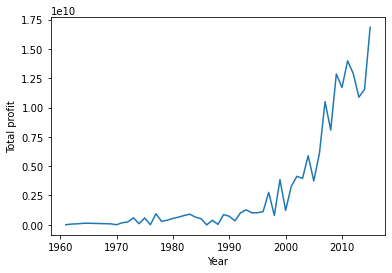

Year with highest profit rate.

    year total_profit
52  2015  16849354885


In [10]:
ndf = df.groupby("release_year")['Profit'].sum() #grouping dataframe by year and calculating total profit in every year
ndf.head()

profdict = {"year":ndf.index, "total_profit":ndf.values}
x = ndf.index
y = ndf.values
prof_df = pd.DataFrame(profdict)
prof_df.head()
max_prof_df = prof_df[prof_df['total_profit']==max(prof_df['total_profit'])]
max_prof_df.head()


plt.xlabel("Year")
plt.ylabel("Total profit")
plt.plot(x, y)
plt.show()


print("Year with highest profit rate.\n")
print(max_prof_df)

Finding average runtime of movies from year to year

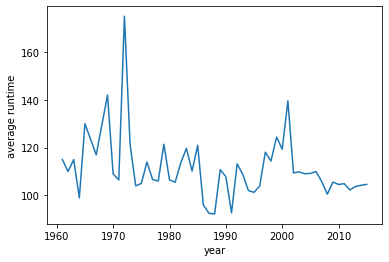

In [11]:
mdf = df.groupby('release_year')['runtime'].mean()
mdf.head()

x = mdf.index
y = mdf.values


plt.xlabel('year')
plt.ylabel('average runtime')
plt.plot(x, y)
plt.show()


Finding which length movies are most liked by the audiences according to their popularity

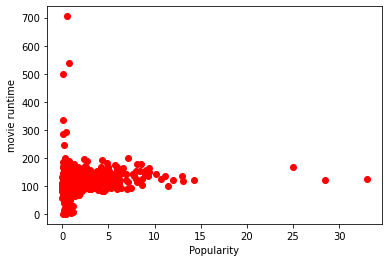

People do not enjoy watching movies having a very high runtime.


In [12]:
X = np.array(df['popularity'], dtype=float)
Y = np.array(df['runtime'], dtype=float)


plt.xlabel('Popularity')
plt.ylabel('movie runtime')
plt.scatter(X, Y, color = 'red')
plt.show()


print("People do not enjoy watching movies having a very high runtime.")

How Does The Revenue And Popularity differs Budget And Runtime? And How Does Popularity Depends On Profit?

[6.27454014e-09 8.10620721e-01]
Equation of line representing relation between profit and popularity : 
popularity = 6.3e-09(profit) + 0.811


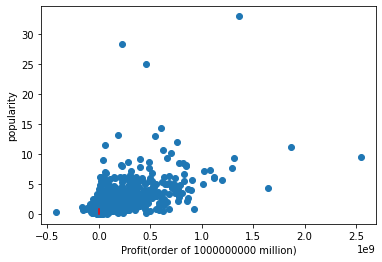

Comparison of scatter plots : 


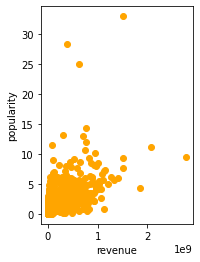

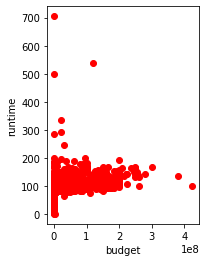

The equation of line for revenue vs popularity :
popularity = 5.5e-09(revenue) + 0.69
The equation of line for budget vs runtime :
runtime=1.6e-07(budget) + 100.66


In [13]:
#relation between popularity and profit
x = df['Profit']
y = df['popularity']
profpop = pd.DataFrame({"Profit":x, "Popularity":y})
fit = np.polyfit(np.array(x, dtype = float), np.array(y, dtype = float), deg=1) #vector containing parameters of line of best fit
print(fit)
print("Equation of line representing relation between profit and popularity : ")
print("popularity = {m}(profit) + {c}".format(m = round(fit[0], 10), c = round(fit[1], 3)))

plt.plot(fit, color = 'red')
plt.scatter(x, y)
plt.xlabel('Profit(order of 1000000000 million)')
plt.ylabel('popularity')
plt.show()


#revenue and popularity vs budget and runtime
revenue = df['revenue']
revenue.head()
pop = df['popularity']
budget = df['budget']
runtime = df['runtime']

print("Comparison of scatter plots : ")
plt.subplot(1, 2, 1)
plt.ylabel("popularity")
plt.xlabel("revenue")
plt.scatter(revenue, pop, color='orange')
plt.show()

plt.subplot(1, 2, 2)
plt.xlabel("budget")
plt.ylabel("runtime")
plt.scatter(budget, runtime, color='red')
plt.show()


revenue = np.array(revenue, dtype=float)
pop = np.array(pop, dtype=float)
budget = np.array(budget, dtype=float)
runtime = np.array(runtime, dtype=float)


v1 = np.polyfit(revenue, pop, deg=1)               #vector containing parameters of line of best fit
v2 = np.polyfit(budget, runtime, deg=1)
print("The equation of line for revenue vs popularity :\npopularity = {m}(revenue) + {c}".format(m=round(v1[0], 10), c=round(v1[1], 2)))
print("The equation of line for budget vs runtime :\nruntime={m}(budget) + {c}".format(m = round(v2[0], 8), c = round(v2[1], 2)))





Finding which genre has highest release of movies

In [14]:
genre_series = df.groupby("genres").size()
genre_series.head()


genre_df = pd.DataFrame({"Genre":genre_series.index, "number of releases":genre_series.values})
best_genre = genre_df[genre_df['number of releases']==max(genre_df['number of releases'])]
best_genre.head()


print("Drama is the movie genre with the highest number of releases")
print("There have been about {n} releases of drama movies".format(n=max(genre_series)))

Drama is the movie genre with the highest number of releases
There have been about 127 releases of drama movies


Top 20 Directors Who Direct Maximum Movies

In [15]:
dir_series = df.groupby('director').size()
dir_series.head()
dir_df = pd.DataFrame({"director":dir_series.index, "number of movies":dir_series.values})
dir_df.sort_values('number of movies', ascending=False, inplace=True) #sort by number of movies directed by each director in descending order
print("Top 20 directors with most directed movies : ")
dir_df.head(20)

Top 20 directors with most directed movies : 


,director,number of movies
579,John Carpenter,17
1205,Steven Soderbergh,11
1206,Steven Spielberg,11
209,Clint Eastwood,8
1070,Robert Zemeckis,8
1038,Ridley Scott,8
977,Peter Jackson,8
1088,Ron Howard,7
959,Paul W.S. Anderson,7
263,David Fincher,7


Top 20 production companies with highest number of releases

Life time profit earned by each production company

In [16]:
#Finding top 20 production companies with highest number of releases
pc_series = df.groupby('production_companies').size()
pc_df = pd.DataFrame({"production_companies":pc_series.index, "number of releases":pc_series.values})
pc_df.sort_values('number of releases', ascending=False, inplace=True)
print("Top 20 production companies with most releases : ")
pc_df.head(20)


#Finding life time profit earned by each production company
pc_profit_df = df.groupby('production_companies')['Profit'].sum().reset_index()
pc_profit_df.head(10000)
print("Greatest lifetime profit : ")
pc_profit_df[pc_profit_df['Profit']==max(pc_profit_df['Profit'])].head()



Top 20 production companies with most releases : 
Greatest lifetime profit : 


,production_companies,Profit
1671,Walt Disney Pictures|Pixar Animation Studios,5247998913


Which Month Released Highest Number Of Movies In All Of The Years? And Which Month Made The Highest Average Revenue?

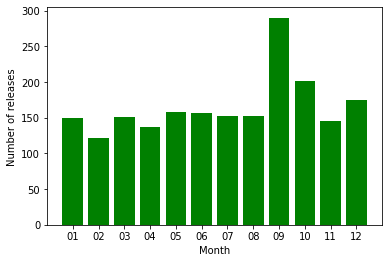

Month with highest number of releases : September


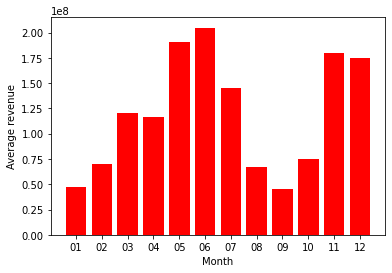

Month with greatest amount of revenue : June


In [17]:
#Finding month with highest movie releases
df['release_date']=pd.to_datetime(df['release_date'])
df['release_date'].head()
df['month of release'] = df['release_date'].astype(str).str[5:7]
df['month of release'].head()
month_data = df.groupby('month of release').size()

x = month_data.index
y = month_data.values
plt.bar(x, y, color = 'green')
plt.xlabel("Month")
plt.ylabel("Number of releases")
plt.show()
print("Month with highest number of releases : September")

#Finding which month has highest average revenue
revenue_data = df.groupby(['month of release'])['revenue'].mean().reset_index()
revenue_data.head()
X = revenue_data['month of release']
Y = revenue_data['revenue']
plt.bar(X, Y, color = 'red')
plt.xlabel("Month")
plt.ylabel("Average revenue")
plt.show()
print("Month with greatest amount of revenue : June")

Creating linear regression model for predicting popularity from revenue

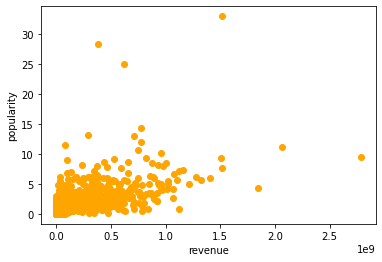

In [31]:
plt.scatter(revenue, pop, color='orange')
plt.xlabel("revenue")
plt.ylabel("popularity")
plt.show()

Splitting the dataset into training and testing data

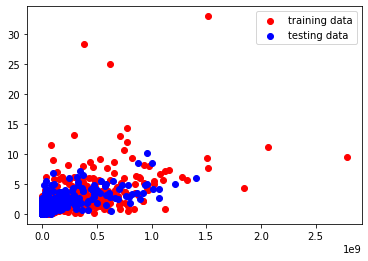

In [33]:
x_train, x_test, y_train, y_test = train_test_split(revenue, pop)
plt.scatter(x_train, y_train, color='red', label='training data')
plt.scatter(x_test, y_test, color='blue', label='testing data')
plt.legend()
plt.show()

Training the model 

In [35]:
LR = LinearRegression()
LR.fit(np.array(x_train).reshape(-1, 1), np.array(y_train))

LinearRegression()

Using our model to predict test data values

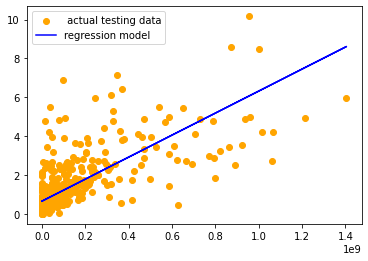

In [40]:
prediction = LR.predict(np.array(x_test).reshape(-1, 1))

plt.scatter(x_test, y_test, color='orange', label=' actual testing data')
plt.plot(x_test, prediction, color='blue', label='regression model')
plt.legend()
plt.show()

Creating linear regression model to predict runtime from budget

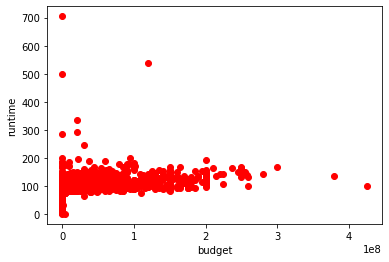

In [41]:
plt.scatter(budget, runtime, color='red')
plt.xlabel('budget')
plt.ylabel('runtime')
plt.show()

Splitting dataset into training and testing data

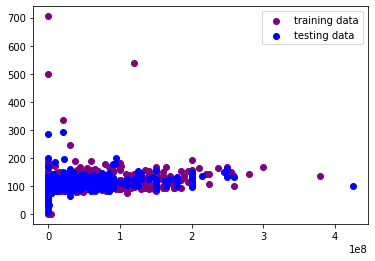

In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(budget, runtime)

plt.scatter(X_train, Y_train, color='purple', label='training data')
plt.scatter(X_test, Y_test, color='blue', label='testing data')
plt.legend()
plt.show()

Training the model

In [44]:
LR = LinearRegression()
LR.fit(np.array(X_train).reshape(-1, 1), np.array(Y_train).reshape(-1, 1))

LinearRegression()

Using the model to predict test values

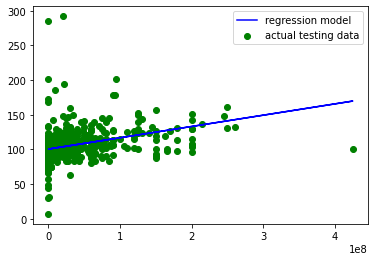

In [45]:
runtime_predict = LR.predict(np.array(X_test).reshape(-1, 1))

plt.plot(X_test, runtime_predict, color='blue', label='regression model')
plt.scatter(X_test, Y_test, color='green', label='actual testing data')
plt.legend()
plt.show()